In [7]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 77s 36us/step


In [8]:
len(train_data)

8982

In [9]:
len(test_data)

2246

In [11]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [16]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [17]:
train_labels[10]

3

In [21]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):  
    results=np.zeros((len(sequences),dimension))    #创建一个形状为(len(sequences),dimension)的零矩阵
    for i,sequence in enumerate(sequences):  #enumerate:python内置函数，枚举
        results[i,sequence]=1.
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [22]:
def to_one_hot(labels,dimension=46):
    results=np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label]=1.
    return results

one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

In [24]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))   #使用softmax激活

In [25]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [26]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [27]:
history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 6s 693us/step - loss: 2.4913 - acc: 0.4927 - val_loss: 1.6735 - val_acc: 0.6450
Epoch 2/20
7982/7982 [==============================] - 2s 241us/step - loss: 1.3845 - acc: 0.7062 - val_loss: 1.2741 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 2s 242us/step - loss: 1.0433 - acc: 0.7714 - val_loss: 1.1149 - val_acc: 0.7640
Epoch 4/20
7982/7982 [==============================] - 2s 241us/step - loss: 0.8208 - acc: 0.8296 - val_loss: 1.0198 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 2s 233us/step - loss: 0.6575 - acc: 0.8647 - val_loss: 0.9685 - val_acc: 0.7980
Epoch 6/20
7982/7982 [==============================] - 2s 241us/step - loss: 0.5238 - acc: 0.8933 - val_loss: 0.9214 - val_acc: 0.8080
Epoch 7/20
7982/7982 [==============================] - 2s 239us/step - loss: 0.4278 - a

In [28]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

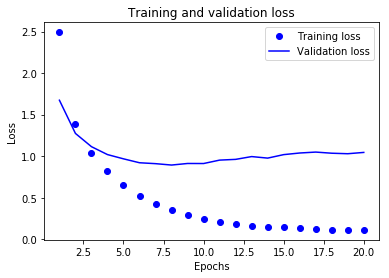

In [30]:
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

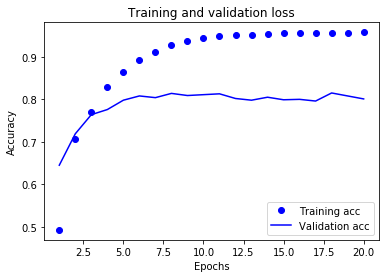

In [31]:
plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax')) 

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
         validation_data=(x_val,y_val))

results=model.evaluate(x_test,one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 328us/step - loss: 2.8047 - acc: 0.5038 - val_loss: 1.8426 - val_acc: 0.6320
Epoch 2/9
7982/7982 [==============================] - 2s 249us/step - loss: 1.5257 - acc: 0.6961 - val_loss: 1.3305 - val_acc: 0.7100
Epoch 3/9
7982/7982 [==============================] - 2s 273us/step - loss: 1.1116 - acc: 0.7707 - val_loss: 1.1381 - val_acc: 0.7470
Epoch 4/9
7982/7982 [==============================] - 2s 276us/step - loss: 0.8719 - acc: 0.8157 - val_loss: 1.0299 - val_acc: 0.7830
Epoch 5/9
7982/7982 [==============================] - 2s 278us/step - loss: 0.7034 - acc: 0.8473 - val_loss: 0.9681 - val_acc: 0.8040
Epoch 6/9
7982/7982 [==============================] - 2s 284us/step - loss: 0.5662 - acc: 0.8756 - val_loss: 0.9412 - val_acc: 0.7990
Epoch 7/9
7982/7982 [==============================] - 2s 272us/step - loss: 0.4570 - acc: 0.9064 - val_loss: 0.9243 - val_acc: 0.7970
Epoch 8

[0.9781010303769065, 0.789848619715401]

In [34]:
#完全随机精度
import copy
test_labels_copy=copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array=np.array(test_labels)==np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.182546749777382

In [35]:
predictions=model.predict(x_test)
predictions
predictions[0].shape

(46,)

In [37]:
np.sum(predictions[0])

0.9999999

In [38]:
np.argmax(predictions[0])

3